# 1. 데이터 로드, 데이터 분석

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pickle
with open('df.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
len(dataset)

62389

<AxesSubplot:>

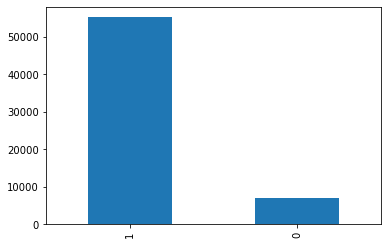

In [5]:
dataset['Label'].value_counts().plot(kind = 'bar')

In [6]:
# 훈련데이터와 테스트데이터 분리
data = dataset['Review']
target = dataset['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=24)

In [7]:
print('총 훈련데이터 샘플의 수 : ', len(x_train))
print('총 훈련데이터 샘플의 수 : ', len(x_test))

총 훈련데이터 샘플의 수 :  49911
총 훈련데이터 샘플의 수 :  12478


<AxesSubplot:>

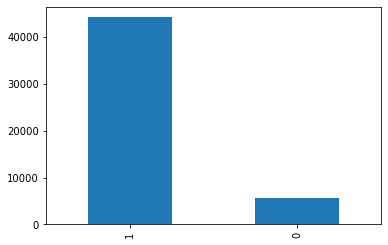

In [8]:
y_train.value_counts().plot(kind = 'bar')

# 2. BERT - FineTuning(Sentence analasis)
## 2-1. 정수 인코딩

In [9]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [10]:
X_train_list = x_train.tolist()
X_test_list = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [11]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [12]:
print(X_train[0].tokens)

['[CLS]', '대하', '##구이', '##는', '언제나', '진리', '##죠', '토', '##실', '##토', '##실', '너무', '[UNK]', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [54]:
# 인코딩 객체 : 인코딩이란 숫자로 해당 텍스트를 나타내는것
X_train[0]

Encoding(num_tokens=108, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [13]:
print(X_train[0].ids)
#id : 각 토큰의 아이디
#ids : 각 토큰의 아이디 시퀀스 -> 즉 정수 인코딩/ 토큰 임베딩

[2, 5081, 19125, 2259, 5641, 6960, 2321, 1793, 2477, 2386, 2477, 3760, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(X_train[0].type_ids) # 각 토큳의 타입 : 즉, 세그먼트 임베딩

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
print(X_train[0].attention_mask) #식제단어라면 숫자 1, 패딩 토큰은 숫자0 어텐션 마스크

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 2-2. 데이터셋 생성 및 모델 학습

In [16]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [17]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [19]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x000001EB013406D0>>

In [ ]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=2)

model.fit(
    #train_data랜덤 셔플
    train_dataset.shuffle(4000).batch(16), epochs=5, batch_size=32,
    validation_data = val_dataset.shuffle(4000).batch(32),
    callbacks = [callback_earlystop]
)

Epoch 1/5
 124/3120 [>.............................] - ETA: 30:06 - loss: 0.0933 - accuracy: 0.9713

In [ ]:
model.evaluate(val_dataset.batch(1024))

In [ ]:
model.save_pretrained('BERT_model/bert-base')
tokenizer.save_pretrained('BERT_model/bert-base')

In [ ]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('BERT_model/bert-base')
loaded_model = TFBertForSequenceClassification.from_pretrained('BERT_model/bert-base')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

## 2-3. 모델 테스트

In [22]:
def show_sentiment(text):
    result = text_classifier(text)[0]
    print('부정일 확률 : ', round(result[0]['score'],3))
    print('긍정일 확률 : ', round(result[1]['score'],3))

In [23]:
text_classifier('위생상태 불량')[0]

[{'label': 'LABEL_0', 'score': 0.9952921867370605},
 {'label': 'LABEL_1', 'score': 0.00470778439193964}]

In [30]:
show_sentiment('위생불량')

부정일 확률 :  0.993
긍정일 확률 :  0.007


In [25]:
show_sentiment('장소가 협소하네요')

부정일 확률 :  0.996
긍정일 확률 :  0.004


In [26]:
show_sentiment('비린맛이 심하네요')

부정일 확률 :  0.984
긍정일 확률 :  0.016


In [27]:
show_sentiment('맛은 좋지만 가성비가 떨어지네요')

부정일 확률 :  0.998
긍정일 확률 :  0.002


In [65]:
show_sentiment('알바가 친절하고 맛도 좋아요')

부정일 확률 :  0.001
긍정일 확률 :  0.999


In [28]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요')

부정일 확률 :  0.001
긍정일 확률 :  0.999


In [31]:
show_sentiment('가성비 좋고, 맛도 무진장 좋아요. 그런데 주차자리가 협소하네요')

부정일 확률 :  0.979
긍정일 확률 :  0.021


In [32]:
show_sentiment('굿')

부정일 확률 :  0.002
긍정일 확률 :  0.998


In [34]:
show_sentiment('개 좋다')

부정일 확률 :  0.002
긍정일 확률 :  0.998


In [35]:
show_sentiment('개 같다')

부정일 확률 :  0.916
긍정일 확률 :  0.084


In [37]:
show_sentiment('장사가 잘되니 초심을 잃었네요')

부정일 확률 :  0.985
긍정일 확률 :  0.015
